# Train DeBCR tutorial

In [15]:
import tensorflow as tf
import os 
import numpy as np
import keras
import matplotlib.pyplot as plt
import glob
import random
from util.utils import *
from configs.yaml_loader import *
import argparse

## Config

In [2]:
# config from yaml file

parser = argparse.ArgumentParser()
parser.add_argument('--config', type=str,
                    default="configs/2D_denoising.yaml", help="Path to yaml config file")
args = parser.parse_args([])
config = get_config(args.config)

## Data

In [3]:
# define the data path 
from natsort import natsorted

DATA_PATH = config.data['data_dir']  # use the definite path!

# training
train_data_dir = DATA_PATH + 'train/'
train_data_list = natsorted(os.listdir(train_data_dir))  

# validate
val_data_dir = DATA_PATH + 'val/'
val_data_list = natsorted(os.listdir(val_data_dir))  

In [4]:
# call for the data generator

# tranining
train_gen_class = DataGenerator(train_data_dir, train_data_list,config.data['train_batch'], config.data['noise'])
train_img_datagen = train_gen_class.imageLoader()

# validate
val_gen_class = DataGenerator(val_data_dir, val_data_list, config.data['val_batch'], config.data['noise'])
val_img_datagen = val_gen_class.imageLoader()

Loading dataset: 2D_denoising_CARE_train.npz
Loading dataset: 2D_denoising_CARE_val.npz
(64, 128, 128, 1)


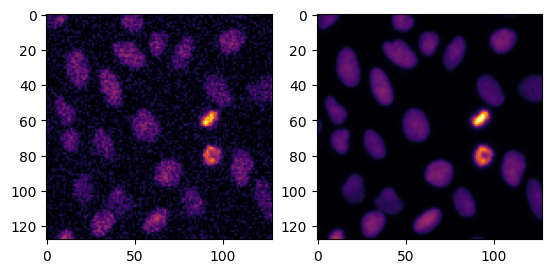

63


In [5]:
# sanity check

w_img_temp, o_temp = train_img_datagen.__next__()
print(w_img_temp.shape)

slice_num = random.randint(0, w_img_temp.shape[0]-1)
subShow(w_img_temp[slice_num].squeeze(), o_temp[slice_num].squeeze())
print(slice_num)

# Model

In [6]:
from models.DeBCR import *
from util.loss_func import *
from util.metrics import *

model = model_DeBCR()
model.compile(optimizer=config.training['opti'], loss=loss_function_mimo, metrics=[metrics_func_mimo])
print(model.input_shape, model.output_shape) # [(None, 128, 128, 1), (None, 64, 64, 1), (None, 32, 32, 1)] 
print(model.summary())

2024-05-26 18:03:16.903187: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-26 18:03:17.525514: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30987 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:62:00.0, compute capability: 7.0


[(None, 128, 128, 1), (None, 64, 64, 1), (None, 32, 32, 1)] [(None, 128, 128, 1), (None, 64, 64, 1), (None, 32, 32, 1)]
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x0_input (InputLayer)           [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
x2_input (InputLayer)           [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
x4_input (InputLayer)           [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
model (Functional)              [(None, 128, 128, 1) 46531       x0_inp

# Train

2024-05-26 18:03:21.161789: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201


0 tf.Tensor(1.1811613, shape=(), dtype=float32) tf.Tensor(14.369527, shape=(), dtype=float32)
Validation best loss: 0 tf.Tensor(1.2277935, shape=(), dtype=float32) tf.Tensor(14.186174, shape=(), dtype=float32)
Objects: 50


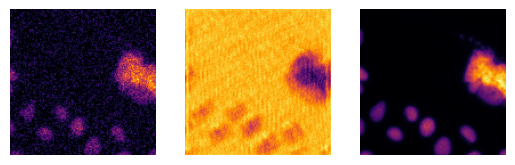

50 tf.Tensor(0.5331371, shape=(), dtype=float32) tf.Tensor(24.593771, shape=(), dtype=float32)
100 tf.Tensor(0.4657846, shape=(), dtype=float32) tf.Tensor(26.19687, shape=(), dtype=float32)
Validation best loss: 100 tf.Tensor(0.48068672, shape=(), dtype=float32) tf.Tensor(25.814787, shape=(), dtype=float32)
Objects: 1


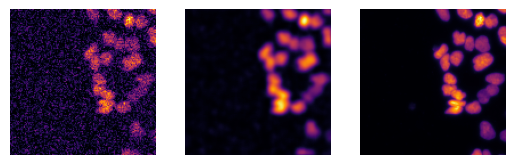

150 tf.Tensor(0.4812623, shape=(), dtype=float32) tf.Tensor(25.006954, shape=(), dtype=float32)
200 tf.Tensor(0.43176007, shape=(), dtype=float32) tf.Tensor(26.28165, shape=(), dtype=float32)
Objects: 13


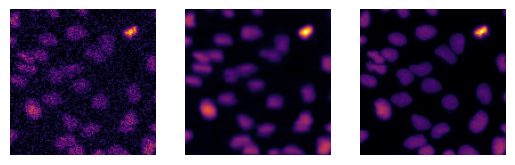

250 tf.Tensor(0.45895514, shape=(), dtype=float32) tf.Tensor(24.661774, shape=(), dtype=float32)
300 tf.Tensor(0.47061664, shape=(), dtype=float32) tf.Tensor(26.541971, shape=(), dtype=float32)
Validation best loss: 300 tf.Tensor(0.4211117, shape=(), dtype=float32) tf.Tensor(27.251148, shape=(), dtype=float32)
Objects: 3


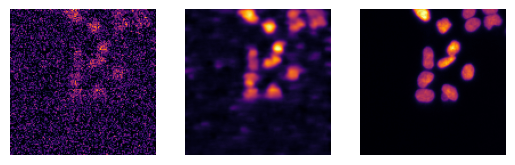

350 tf.Tensor(0.41497675, shape=(), dtype=float32) tf.Tensor(27.159697, shape=(), dtype=float32)
400 tf.Tensor(0.449878, shape=(), dtype=float32) tf.Tensor(26.263897, shape=(), dtype=float32)
Objects: 38


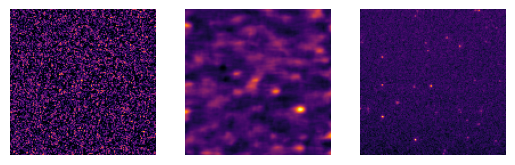

450 tf.Tensor(0.3877225, shape=(), dtype=float32) tf.Tensor(26.949364, shape=(), dtype=float32)
500 tf.Tensor(0.4033828, shape=(), dtype=float32) tf.Tensor(27.986639, shape=(), dtype=float32)
Objects: 29


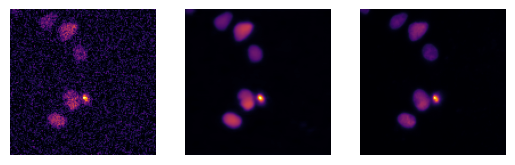

550 tf.Tensor(0.41646343, shape=(), dtype=float32) tf.Tensor(27.17265, shape=(), dtype=float32)
600 tf.Tensor(0.4039112, shape=(), dtype=float32) tf.Tensor(26.007336, shape=(), dtype=float32)
Validation best loss: 600 tf.Tensor(0.3838525, shape=(), dtype=float32) tf.Tensor(29.431622, shape=(), dtype=float32)
Objects: 4


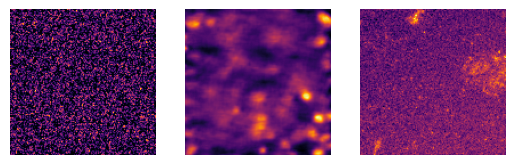

650 tf.Tensor(0.3735733, shape=(), dtype=float32) tf.Tensor(28.550737, shape=(), dtype=float32)
700 tf.Tensor(0.43274808, shape=(), dtype=float32) tf.Tensor(25.775385, shape=(), dtype=float32)
Objects: 44


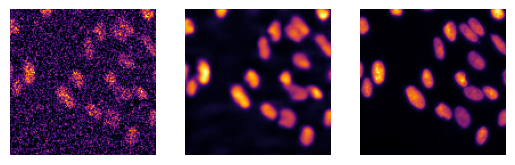

750 tf.Tensor(0.39439097, shape=(), dtype=float32) tf.Tensor(28.15408, shape=(), dtype=float32)
800 tf.Tensor(0.3676178, shape=(), dtype=float32) tf.Tensor(28.844746, shape=(), dtype=float32)
Objects: 58


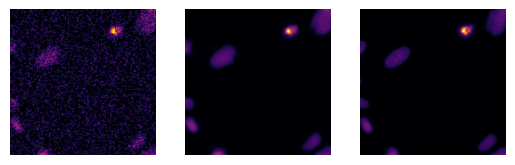

850 tf.Tensor(0.4360404, shape=(), dtype=float32) tf.Tensor(23.5899, shape=(), dtype=float32)
900 tf.Tensor(0.42235225, shape=(), dtype=float32) tf.Tensor(26.471842, shape=(), dtype=float32)
Objects: 15


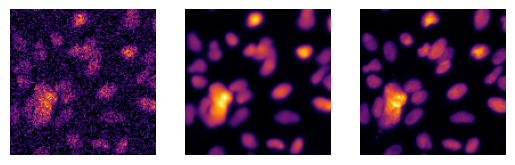

950 tf.Tensor(0.38862473, shape=(), dtype=float32) tf.Tensor(27.252039, shape=(), dtype=float32)
1000 tf.Tensor(0.3833808, shape=(), dtype=float32) tf.Tensor(26.39834, shape=(), dtype=float32)
Validation best loss: 1000 tf.Tensor(0.37998253, shape=(), dtype=float32) tf.Tensor(28.890661, shape=(), dtype=float32)
Objects: 51


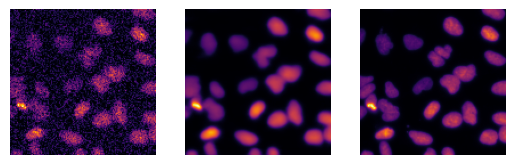

1050 tf.Tensor(0.38171595, shape=(), dtype=float32) tf.Tensor(26.918268, shape=(), dtype=float32)
1100 tf.Tensor(0.37962627, shape=(), dtype=float32) tf.Tensor(26.889349, shape=(), dtype=float32)
Objects: 0


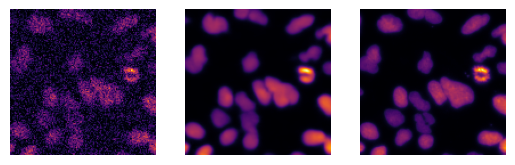

1150 tf.Tensor(0.3731596, shape=(), dtype=float32) tf.Tensor(28.445152, shape=(), dtype=float32)
1200 tf.Tensor(0.39429396, shape=(), dtype=float32) tf.Tensor(25.444235, shape=(), dtype=float32)
Objects: 57


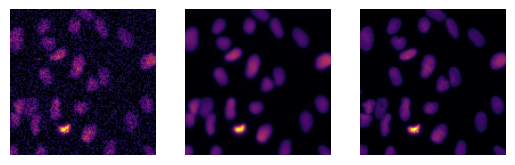

1250 tf.Tensor(0.35342038, shape=(), dtype=float32) tf.Tensor(29.064022, shape=(), dtype=float32)
1300 tf.Tensor(0.38931555, shape=(), dtype=float32) tf.Tensor(27.248861, shape=(), dtype=float32)
Objects: 49


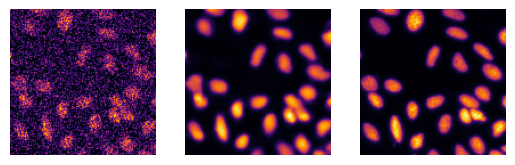

1350 tf.Tensor(0.3964672, shape=(), dtype=float32) tf.Tensor(27.659737, shape=(), dtype=float32)
1400 tf.Tensor(0.35297936, shape=(), dtype=float32) tf.Tensor(28.496061, shape=(), dtype=float32)
Objects: 35


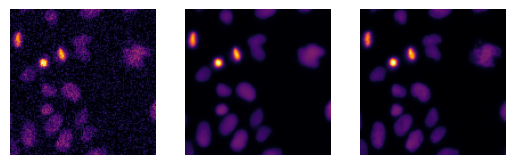

1450 tf.Tensor(0.35700402, shape=(), dtype=float32) tf.Tensor(28.63719, shape=(), dtype=float32)
1500 tf.Tensor(0.35758024, shape=(), dtype=float32) tf.Tensor(29.284477, shape=(), dtype=float32)
Objects: 21


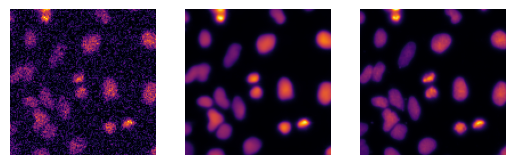

1550 tf.Tensor(0.41382208, shape=(), dtype=float32) tf.Tensor(27.694315, shape=(), dtype=float32)
1600 tf.Tensor(0.40974683, shape=(), dtype=float32) tf.Tensor(26.483116, shape=(), dtype=float32)
Validation best loss: 1600 tf.Tensor(0.31694913, shape=(), dtype=float32) tf.Tensor(30.386572, shape=(), dtype=float32)
Objects: 5


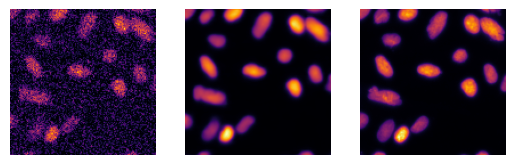

1650 tf.Tensor(0.3716826, shape=(), dtype=float32) tf.Tensor(26.691725, shape=(), dtype=float32)
1700 tf.Tensor(0.35955143, shape=(), dtype=float32) tf.Tensor(29.100496, shape=(), dtype=float32)
Objects: 61


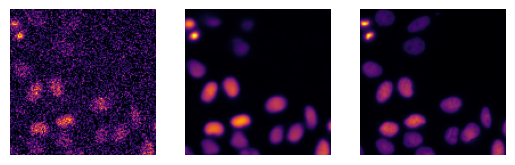

1750 tf.Tensor(0.3831995, shape=(), dtype=float32) tf.Tensor(28.112562, shape=(), dtype=float32)
1800 tf.Tensor(0.37546998, shape=(), dtype=float32) tf.Tensor(28.288116, shape=(), dtype=float32)
Objects: 4


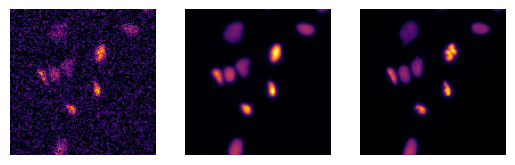

1850 tf.Tensor(0.3850528, shape=(), dtype=float32) tf.Tensor(27.17395, shape=(), dtype=float32)
1900 tf.Tensor(0.38807142, shape=(), dtype=float32) tf.Tensor(27.458666, shape=(), dtype=float32)
Objects: 41


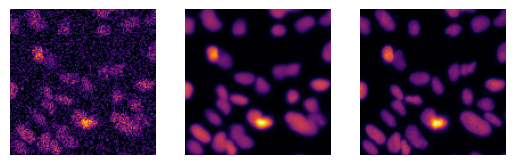

1950 tf.Tensor(0.3443162, shape=(), dtype=float32) tf.Tensor(28.088285, shape=(), dtype=float32)
Elapsed time: 971.6814451217651


In [7]:
from trainer_BCR import train_model_LM

model_trained = train_model_LM(config, model, multi_input, loss_function_mimo, metrics_func_mimo, train_img_datagen, val_img_datagen)

# Visualization

In [14]:
# visualize part prediction results

w_img_val_temp, o_val_temp = val_img_datagen.__next__()
w_val_temp_list, o_val_temp_list = multi_input(w_img_val_temp, o_val_temp)

pred_val_list = model_trained.predict(w_val_temp_list) 

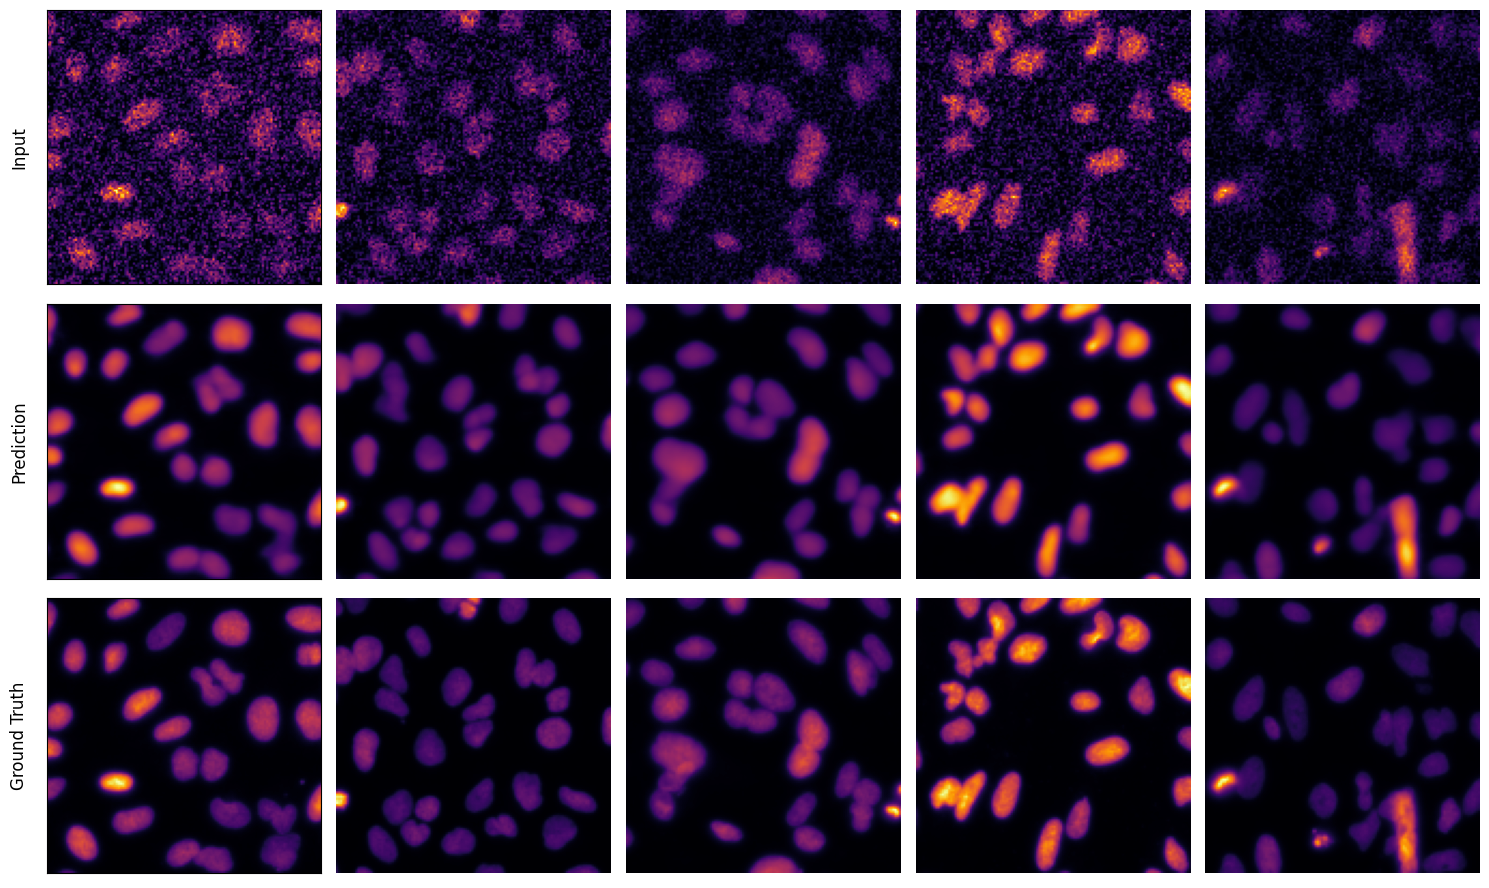

In [22]:
# from util.utils import show_grid_LM

show_grid_LM(pred_val_list[0], w_val_temp_list[0], o_val_temp_list[0])